In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import roc_curve,accuracy_score,auc,roc_auc_score,confusion_matrix,f1_score

from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.decomposition import PCA, FastICA

from sklearn.cluster import KMeans



import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Mall_Customers.csv")

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.drop(['CustomerID'],axis=1,inplace=True) # We dont need Customer ID

In [6]:
df.columns=['Gender','Age','Annual_Income','Spending_Score'] #change the names of the columns

In [7]:
# Convert gender to 1 and 0
df['Gender'].replace({'Male':0,'Female':1},inplace=True)
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


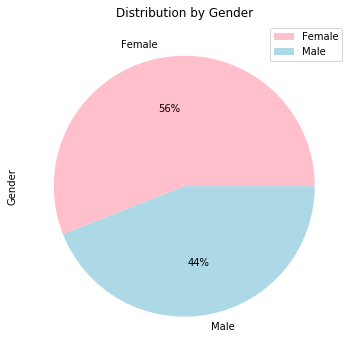

In [8]:
list_gen=df['Gender'].value_counts()
list_gen.plot.pie(figsize=(6, 6), legend=True,autopct='%1.0f%%',labels=['Female','Male'],colors=['pink','lightblue'])
plt.title('Distribution by Gender')
plt.show()

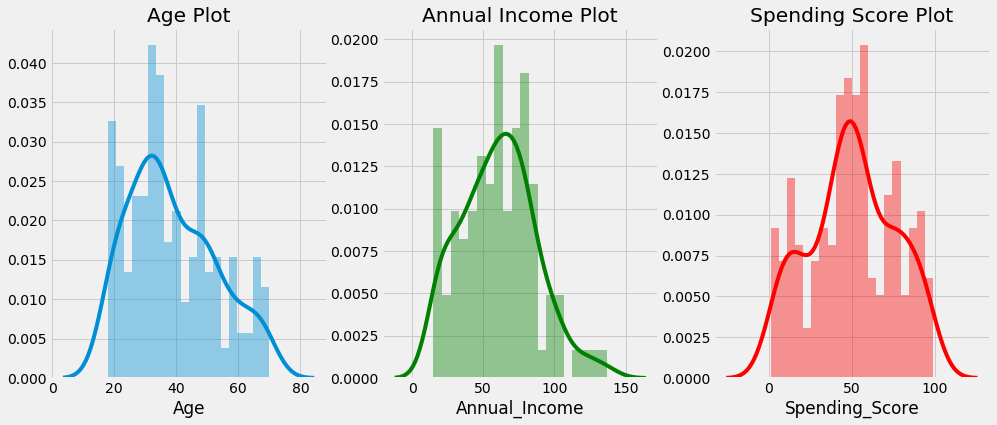

In [9]:
plt.style.use('fivethirtyeight')
AgePlot = df['Age'].value_counts()
IncomePlot = df['Annual_Income'].value_counts().sort_values()
ScorePlot = df['Spending_Score'].value_counts().sort_values()
fig, axs = plt.subplots(1,3,figsize=(15, 6))
sns.distplot(df['Age'] , bins = 20, ax=axs[0])
axs[0].title.set_text('Age Plot')
sns.distplot(df['Annual_Income'] , bins = 20,color='g',ax=axs[1])
axs[1].title.set_text('Annual Income Plot')
sns.distplot(df['Spending_Score'] , bins = 20,color='r',ax=axs[2])
axs[2].title.set_text('Spending Score Plot')

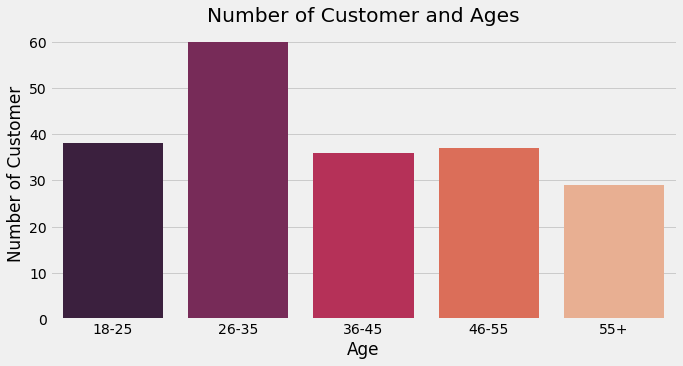

In [10]:
age18_25 = df[(df['Age'] <= 25) & (df['Age']>= 18)]['Age'].count()
age26_35 = df[(df['Age'] <= 35) & (df['Age']>= 26)]['Age'].count()
age36_45 = df[(df['Age'] <= 45) & (df['Age']>= 36)]['Age'].count()
age46_55 = df[(df['Age'] <= 55) & (df['Age']>= 46)]['Age'].count()
age55above =df[df['Age']>= 56]['Age'].count()
x = '18-25 26-35 36-45 46-55 55+'.split()
y = (age18_25, age26_35, age36_45 ,age46_55 ,age55above)
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

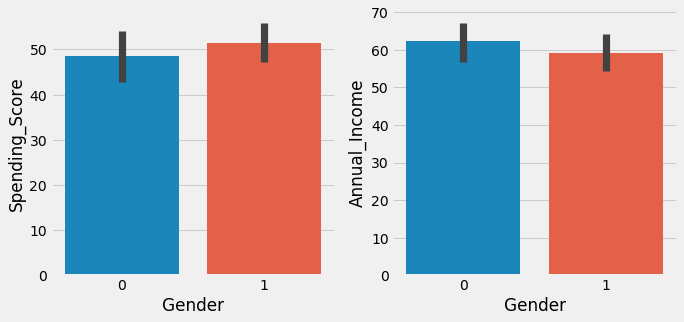

In [11]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
sns.barplot(y='Spending_Score',x='Gender', data=df);
ax2 = fig.add_subplot(2,2,2)
sns.barplot(y='Annual_Income',x='Gender', data=df)
plt.show()

We can conclude from the graph above that female's annual income is lower, but their spending score is higher

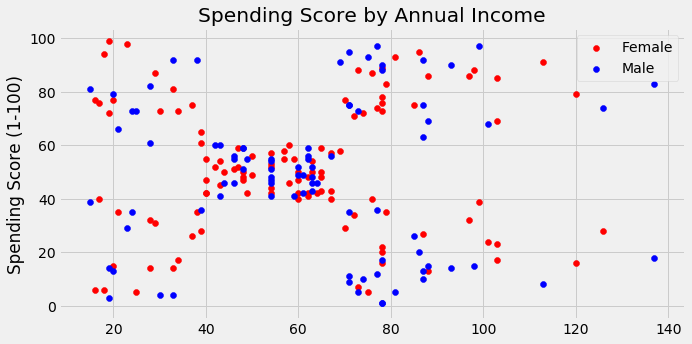

In [12]:
df0=df[df['Gender']==0]
df1=df[df['Gender']==1]
fig = plt.figure(figsize=(10,5))
plt.scatter(df1['Annual_Income'], df1['Spending_Score'],color='red',label='Female')
plt.scatter(df0['Annual_Income'], df0['Spending_Score'],color='blue',label='Male')

plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Annual Income')
plt.legend()
plt.show()

We can see that people who earns around 50k, has a similar spending score,
and that the gender doesn't seem to have a huge impact.




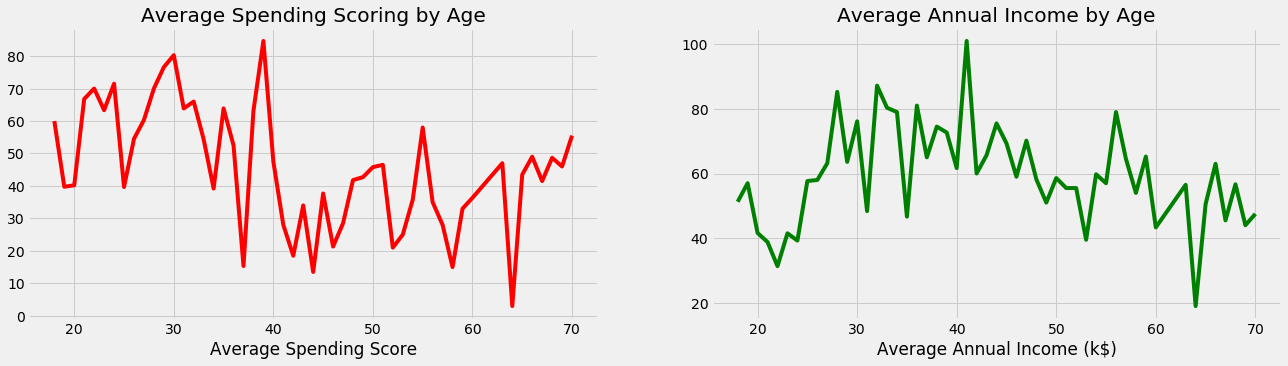

In [13]:
age_count_scr=pd.DataFrame(df.groupby('Age')['Spending_Score'].mean())
fig,axes=plt.subplots(1,2,figsize=(20,5))
axes[0].plot(age_count_scr.index,age_count_scr['Spending_Score'],color='red')
axes[0].set_xlabel("Average Spending Score")
axes[0].set_title('Average Spending Scoring by Age')
age_count_sal=pd.DataFrame(df.groupby('Age')['Annual_Income'].mean())
axes[1].plot(age_count_sal.index,age_count_sal['Annual_Income'],color='green')
axes[1].set_xlabel("Average Annual Income (k$)")
axes[1].set_title('Average Annual Income by Age')
plt.show()

We can coclude from the graph above that in around age 40 people spend the more but also earn the most.

Around ages 20-25 people tend to earn less but spend more.

Around 60-70 people don't earn so much but also don't spend so much.

# Creating Lable

In [14]:
MeanSS=df['Spending_Score'].mean()
df['Target'] = np.where(df['Spending_Score']>MeanSS, 1, 0)
df.head()


,Gender,Age,Annual_Income,Spending_Score,Target
0,0,19,15,39,0
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,0


Adding labels to data where the Spending score is greater/Less than Spending Score mean value

1: Target- people who spend above the average (Our target costumers)

0: Non-Target - people who do not spend so much

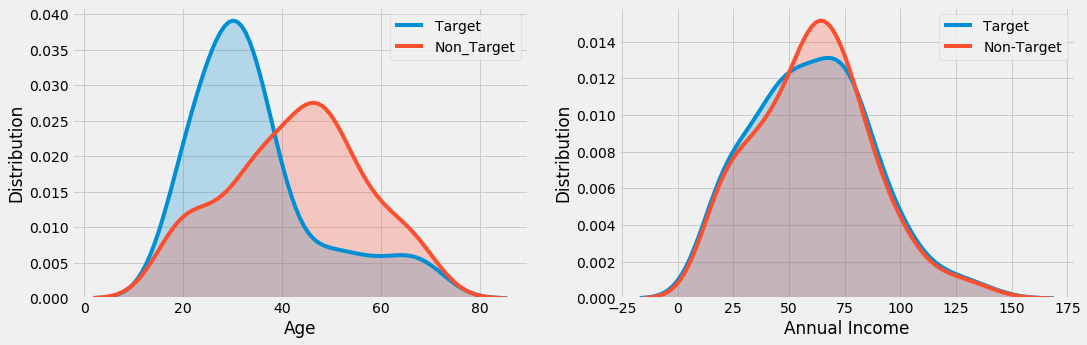

In [15]:
chart=df.drop(["Spending_Score"],axis=1)

fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(16,5))

sns.kdeplot(chart.Age[chart.Target==1], label='Target', shade=True, ax=ax1)
sns.kdeplot(chart.Age[chart.Target==0], label='Non_Target', shade=True, ax=ax1)
ax1.set_ylabel('Distribution')
ax1.set_xlabel('Age')

sns.kdeplot(chart.Annual_Income[chart.Target==1], label='Target', shade=True, ax=ax2)
sns.kdeplot(chart.Annual_Income[chart.Target==0], label='Non-Target', shade=True, ax=ax2)
ax2.set_ylabel('Distribution')
ax2.set_xlabel('Annual Income')
plt.show()

Age seems like a really good predictor and annual income has a slight inverse effect on target/non-target.


**The goal is to classify the mall's customers to Targets & Non-Targets costumers according to their features.** (classification problem)

# Features Selection

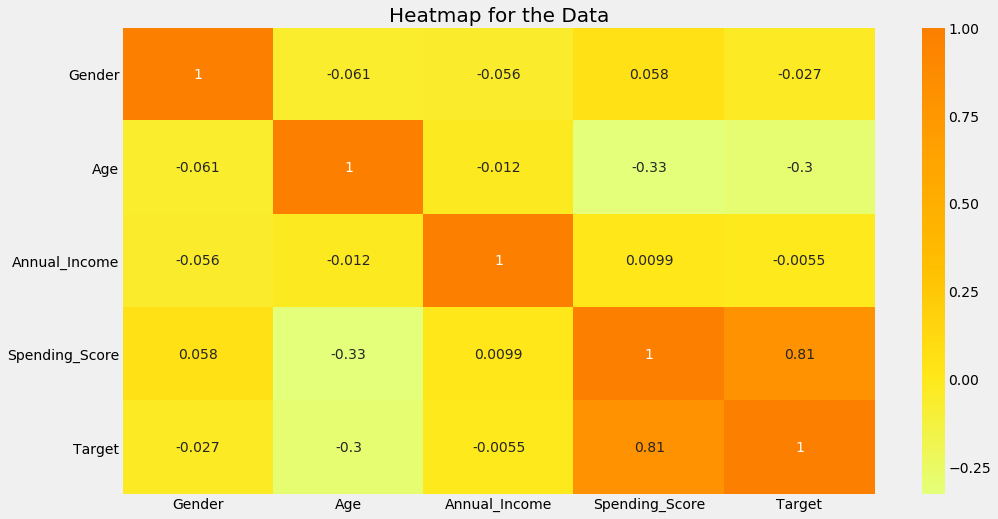

In [16]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The above graph showing the correlation between the different attributes of the Mall Customer, This Heat map reflects the most correlated features with orange color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

# Features Scaling & Train-Test Split

In [17]:
original_df=df
scaler = StandardScaler()
model_df=df.drop(['Target','Spending_Score'],axis=1)
scaled_df= scaler.fit_transform(model_df)
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=('Gender','Age','Annual_Income')

In [18]:
X = scaled_df
y = df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (134, 3)
Training Labels: (134,)
Testing FeatureSet: (66, 3)
Testing Labels: (66,)


# KNN model

**GridSearchCV: Parameters tuning**

In [ ]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_neighbors': 18, 'weights': 'distance'}


We choose **k=18 , distance**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=18,weights='distance')
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",knn.score(X_test,y_test))
print("Training Score: ",knn.score(X_train, y_train))

{0: 30, 1: 36}
Testing Score:  0.6363636363636364
Training Score:  1.0


In [ ]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()


predicted    
                 0   1
actual 0        20  14
       1        10  22

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
f=f1_score(y_test, y_pred,average='weighted')
print('f-score', f)

True Positives (TP): 22
True Negatives (TN): 20
False Positives (FP): 14
False Negarives (FN): 10
Classification Error: 0.36363636363636365
Sensitivity: 0.6875
Specificity: 0.5882352941176471
f-score 0.6356951871657753


In [ ]:
print("Accuracy of KNN (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of KNN (cross-validation): ",cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

Accuracy of KNN (split):  0.6363636363636364
Accuracy of KNN (cross-validation):  0.6643358395989974


We can see that cross-validation has better accuracy.

***ROC & AUC***

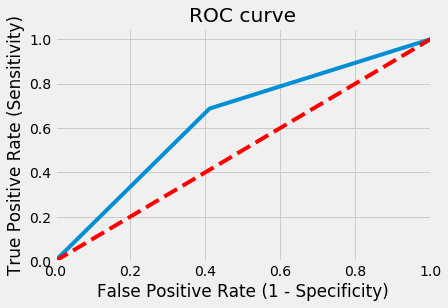

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.show()


In [ ]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [ ]:
evaluate_threshold(0.5)

Sensitivity: 0.6875
Specificity: 0.5882352941176471


**AUC:**

In [ ]:
auc=metrics.roc_auc_score(y_test, y_pred)
auc_cv=cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean()
print('AUC:',auc)
print('AUC with cross-validation:',auc_cv)

AUC: 0.6378676470588236
AUC with cross-validation: 0.7303080808080809


# Gaussian Naive Bayes model

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",gnb.score(X_test,y_test))
print("Training Score: ",gnb.score(X_train, y_train))

{0: 31, 1: 35}
Testing Score:  0.7121212121212122
Training Score:  0.6940298507462687


In [ ]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

predicted    
                 0   1
actual 0        23  11
       1         8  24

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
f=f1_score(y_test, y_pred,average='weighted')
print('f-score', f)

True Positives (TP): 24
True Negatives (TN): 23
False Positives (FP): 11
False Negarives (FN): 8
Classification Error: 0.2878787878787879
Sensitivity: 0.75
Specificity: 0.6764705882352942
f-score 0.711922902967679


In [ ]:
print("Accuracy of GaussianNB (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of GaussianNB (cross-validation): ",cross_val_score(gnb, X, y, cv=10, scoring='accuracy').mean())
acu_gnb=(metrics.accuracy_score(y_test, y_pred))

Accuracy of GaussianNB (split):  0.7121212121212122
Accuracy of GaussianNB (cross-validation):  0.6793609022556392


We can see that when we split the data we have better accuracy.

***ROC & AUC***

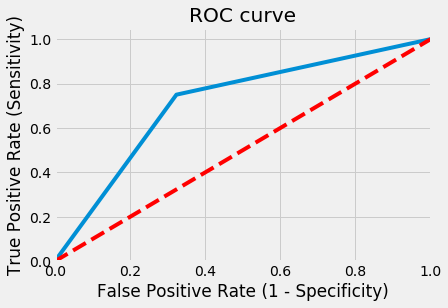

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.show()

In [ ]:
evaluate_threshold(0.5)

Sensitivity: 0.75
Specificity: 0.6764705882352942


**AUC:**

In [ ]:
auc=metrics.roc_auc_score(y_test, y_pred)
auc_cv=cross_val_score(gnb, X, y, cv=10, scoring='roc_auc').mean()
print('AUC:',auc)
print('AUC with cross-validation:',auc_cv)

AUC: 0.7132352941176471
AUC with cross-validation: 0.6819242424242423


# Adaboost model

**GridSearchCV: Parameters tuning**

In [ ]:
ada=AdaBoostClassifier()
parm_grid={'n_estimators':[50,100,150],'learning_rate':[0.001,0.01,0.1]}
grid=GridSearchCV(estimator=ada,param_grid=parm_grid,scoring='accuracy',cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'learning_rate': 0.001, 'n_estimators': 50}


In [ ]:
adab = AdaBoostClassifier(n_estimators=50,learning_rate= 0.001,random_state=42 )
adab.fit(X_train, y_train)
y_pred = adab.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",adab.score(X_test,y_test))
print("Training Score: ",adab.score(X_train, y_train))

{0: 31, 1: 35}
Testing Score:  0.7121212121212122
Training Score:  0.7014925373134329


In [ ]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

predicted    
                 0   1
actual 0        23  11
       1         8  24

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
f=f1_score(y_test, y_pred,average='weighted')
print('f-score', f)

True Positives (TP): 24
True Negatives (TN): 23
False Positives (FP): 11
False Negarives (FN): 8
Classification Error: 0.2878787878787879
Sensitivity: 0.75
Specificity: 0.6764705882352942
f-score 0.711922902967679


In [ ]:
print("Accuracy of Adaboost (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of Adaboost (cross-validation): ",cross_val_score(adab, X, y, cv=10, scoring='accuracy').mean())
acu_adab=(metrics.accuracy_score(y_test, y_pred))

Accuracy of Adaboost (split):  0.7121212121212122
Accuracy of Adaboost (cross-validation):  0.7054135338345865


We can see that when we split the data we have better accuracy.

***ROC & AUC***

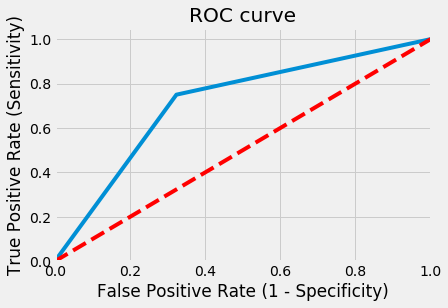

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.show()

In [ ]:
evaluate_threshold(0.5)

Sensitivity: 0.75
Specificity: 0.6764705882352942


**AUC:**

In [ ]:
auc=metrics.roc_auc_score(y_test, y_pred)
auc_cv=cross_val_score(adab, X, y, cv=10, scoring='roc_auc').mean()
print('AUC:',auc)
print('AUC with cross-validation:',auc_cv)

AUC: 0.7132352941176471
AUC with cross-validation: 0.71


# Logisitc Regression

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print('(best parameters)' ,logreg_cv.best_params_)

(best parameters) {'C': 0.01, 'penalty': 'l2'}


In [ ]:
logreg = LogisticRegression(C=0.01,penalty='l2')
logreg.fit(X, y)
y_pred=logreg.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",logreg.score(X_test,y_test))
print("Training Score: ",logreg.score(X_train, y_train))

{0: 32, 1: 34}
Testing Score:  0.696969696969697
Training Score:  0.7014925373134329


In [ ]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

predicted    
                 0   1
actual 0        23  11
       1         9  23

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
f=f1_score(y_test, y_pred,average='weighted')
print('f-score', f)

True Positives (TP): 23
True Negatives (TN): 23
False Positives (FP): 11
False Negarives (FN): 9
Classification Error: 0.30303030303030304
Sensitivity: 0.71875
Specificity: 0.6764705882352942
f-score 0.696969696969697


In [ ]:
print("Accuracy of Logistic Regression (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of Logistic Regression (cross-validation): ",cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
acu_logreg=(metrics.accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression (split):  0.696969696969697
Accuracy of Logistic Regression (cross-validation):  0.6948872180451129


We can see that there is no big difference between cv and splitting

***ROC & AUC***

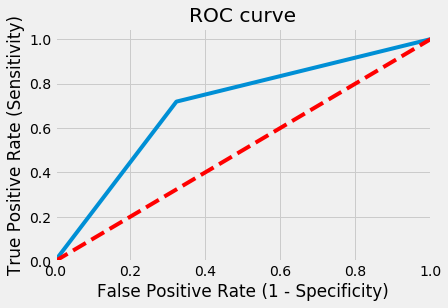

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.show()

In [ ]:
evaluate_threshold(0.5)

Sensitivity: 0.71875
Specificity: 0.6764705882352942


**AUC:**

In [ ]:
auc=metrics.roc_auc_score(y_test, y_pred)
auc_cv=cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()
print('AUC:',auc)
print('AUC with cross-validation:',auc_cv)

AUC: 0.6976102941176472
AUC with cross-validation: 0.6864595959595959


# Decision Tree Model

In [ ]:
param_grid={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train,y_train)
print(grid.best_params_)

In [ ]:
dt = DecisionTreeClassifier(random_state=42,max_depth= 3,min_samples_split= 70)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))
print("Testing Score: ",dt.score(X_test,y_test))
print("Training Score: ",dt.score(X_train, y_train))

In [ ]:
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
f=f1_score(y_test, y_pred,average='weighted')
print('f-score', f)

In [ ]:
print("Accuracy of Decision Tree (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of Decision Tree (cross-validation): ",cross_val_score(dt, X, y, cv=10, scoring='accuracy').mean())
acu_dt=(cross_val_score(dt, X, y, cv=10, scoring='accuracy').mean())

We can see that cross-validation has better accuracy.

***ROC & AUC***

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.show()

In [ ]:
evaluate_threshold(0.5)

**AUC:**

In [ ]:
auc=metrics.roc_auc_score(y_test, y_pred)
auc_cv=cross_val_score(dt, X, y, cv=10, scoring='roc_auc').mean()
print('AUC:',auc)
print('AUC with cross-validation:',auc_cv)

In [ ]:
print("Accuracy of KNN (cross-validation): ",cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print("Accuracy of GaussianNB (split): ",acu_gnb)
print("Accuracy of Adaboost (split): ",acu_adab)
print("Accuracy of Logistic Regression (split): ",acu_logreg)
print("Accuracy of Decision Tree (cross-validation): ",acu_dt)

**We can conclude that all the models' accuracy is around 66-71%**

**The best models are Decision Tree, GaussianNB and Adaboost with accuracy of 71%.**

# PCA

In [ ]:
algoritms= ["k-Nearest Neighbors","Gaussian Naive Bayes","AdaBoost","Logistic Regression","Decision Tree"]
models= [knn, gnb, adab, logreg, dt]
y=original_df['Target']
original_df2=original_df.drop(['Spending_Score','Target'],axis=1)


In [ ]:
accuracies = pd.DataFrame(index=algoritms)
for n in np.arange(1,4,1):
    col=np.arange(1,n+1,1)
    pca = PCA(n_components=n)
    pca.fit(original_df2)
    pc123 = pca.fit_transform(original_df2)
    df_pca = pd.DataFrame(
    pc123,
    columns=col)
    X = df_pca
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
    result=[]
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        result.append(metrics.accuracy_score(y_test, y_pred))
    result = pd.DataFrame(result, index=algoritms)   
    result.columns=[n]
    accuracies = pd.concat([accuracies,result],axis=1)
accuracies

In [ ]:
ac=(accuracies.max()).max()
print('The best accuracy using PCA is:')
print(ac)
print()
for n in np.arange(1,4,1):
    m=accuracies[(accuracies[n]==ac)].index
    if(not m.empty):
        print('The models:',m.values)
        print('Number of components: ',n)

We can conclude that the best models using PCA are 'AdaBoost' 'Logistic Regression' and 'Decision Tree', and all with 2/3 components.

# ICA

In [ ]:
accuracies2 = pd.DataFrame(index=algoritms)
for n in np.arange(1,4,1):
    col=np.arange(1,n+1,1)
    ica = FastICA(n_components=n,random_state=42)
    ica.fit(original_df2)
    ica123 = ica.fit_transform(original_df2)
    df_ica = pd.DataFrame(
    ica123,
    columns=col)
    X = df_ica
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
    result=[]
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        result.append(metrics.accuracy_score(y_test, y_pred))
    result = pd.DataFrame(result, index=algoritms)   
    result.columns=[n]
    accuracies2 = pd.concat([accuracies2,result],axis=1)
accuracies2

In [ ]:
ac=(accuracies2.max()).max()
print('The best accuracy using ICA is:')
print(ac)
print()
for n in np.arange(1,4,1):
    m=accuracies2[(accuracies2[n]==ac)].index
    if(not m.empty):
        print('The models:',m.values)
        print('Number of components: ',n)

We can conclude that the best model using ICA is Knn with 2 components, but with the same accuracy as PCA accurcies.

**There is no an impact change using ICA, PCA but still the accuracy is better than before.**

# The Best Models:

****Logistic Regression model (with PCA):****

In [ ]:
pca =PCA(n_components=3)
pca.fit(original_df2)
pca123 = pca.transform(original_df2)
df_pca = pd.DataFrame(
    pca123,
    columns=[['PC1','PC2','PC3']])
X = df_pca
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=42)


In [ ]:
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
f=f1_score(y_test, y_pred,average='weighted')
print('f-score', f)

**AUC:**

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.show()

In [ ]:
evaluate_threshold(0.5)

In [ ]:
auc=metrics.roc_auc_score(y_test, y_pred)
auc_cv=cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean()
print('AUC:',auc)

****AdaBoost (with PCA):****

In [ ]:
adab.fit(X_train,y_train)
y_pred = adab.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

*They have the same confusion matrix.

****Decision Tree (with PCA):****

In [ ]:
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
f=f1_score(y_test, y_pred,average='weighted')
print('f-score', f)

In [ ]:
auc=metrics.roc_auc_score(y_test, y_pred)
auc_cv=cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean()
print('AUC:',auc)

**Knn (with ICA):**

In [ ]:
ica =FastICA(n_components=2)
ica.fit(original_df2)
ica12 = ica.transform(original_df2)
df_ica = pd.DataFrame(
    ica12,
    columns=[['IC1','IC2']])
X = df_ica
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.30, random_state=42)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
df = pd.DataFrame(
    metrics.confusion_matrix(y_test,y_pred),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
df.head()

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
f=f1_score(y_test, y_pred,average='weighted')
print('f-score', f)

In [ ]:
auc=metrics.roc_auc_score(y_test, y_pred)
auc_cv=cross_val_score(knn, X, y, cv=10, scoring='roc_auc').mean()
print('AUC:',auc)

In [ ]:
acu=0.7166666666666667*100
print('The best accuracy is:', acu,'%')

# Zero Model

In [ ]:
X = scaled_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dc = DummyClassifier(strategy="uniform")
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
label, count = np.unique(np.array(y_pred), return_counts=True)
print(dict(zip(label, count)))

In [ ]:
print("Accuracy of Dummy Classifier (split): ",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of Dummy Classifier (cross-validation): ",cross_val_score(dc, X, y, cv=10, scoring='accuracy').mean())

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('True Positives (TP):',TP)
print('True Negatives (TN):',TN)
print('False Positives (FP):',FP)
print('False Negarives (FN):',FN)
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
f=f1_score(y_test, y_pred,average='weighted')
print('f-score', f)

Our models are doing much better than zero model!

# K Means

  We consider the Annual Income and Spending score to make cluster 

 **Elbow Method for Finding K for K-Means**

In [ ]:
plt.style.use('bmh')
plt.figure(figsize=(10,5))
x = original_df[['Annual_Income' , 'Spending_Score']].iloc[: , :].values        
wcss=[]#within cluster sum of squares
for i in range(1,11):
        kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='s',markersize=8,markerfacecolor='yellow')        
plt.title("Elbow Method")
plt.xlabel("Number of custers")
plt.xlim(1,10)
plt.ylabel("wcss: sum of dist. of sample to their closest cluster center")
plt.show()

So we can conclude from the above line chart that 5 would be the optimal number of clusters for our customer data.

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
point_size = 25
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Careful', 'Standard', 'Target', 'Careless', 'Sensible']

plt.figure(figsize = (7,5))
for i in range(5):
    plt.scatter(x[y_kmeans == i,0], x[y_kmeans == i,1], s = point_size, c = colors[i], label = labels[i])
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'orange', label = 'Center')
plt.title('Clusters of Clients',fontsize=15)
plt.xlabel('Annual_Income',fontsize=15)
plt.ylabel('Spending_Score',fontsize=15)
plt.legend(loc = 'best')
plt.show()

From the above visualizations we have the following clusters:

*Sensible*- People with low earning and low spending score, they are not a big target audience for us. But we can increase their spending score by offering low price products and attractive discounts.

*Target*- People with high annual income and high spending score, they are the target that we want to focus most on, as they can afford costly products and they are interested in buying from us.

*Carful*- People we should least focus on as they don't buy from us even if they can afford it.

*Standard*- People with average income and average spending score. They need to be retained, as they dont spend a huge amount they would probably be attracted a lot by discounts and offers catered to them. Also this is the largest segment of the customers, so we should concentrate to increase their retentivity and spending score.

*Careless*- People with low income but with high spending score, in our dataset, they are a minority, but they would like low price products as they can afford them and it is clear that if they spend so much in our mall even with low income, they are likely to come back to us. We should alert them of products which are low priced and provide good value.